## DataSet



In [11]:
import numpy as np

def have_euler_cycle(matrix):
    for index, line in enumerate(matrix):
        if (sum(line) + line[index]) % 2 != 0:
            return False
    return True

def random_graphe(size):
    b = np.random.choice((True, False), size=(size,size), p=[0.4, 0.6])
    b_symm = np.logical_or(b, b.T)
    matrix = b_symm.astype(int)
    return matrix

matrix_list = []

for i in range(4, 20):
    temp_matrix = random_graphe(i)
    while not have_euler_cycle(temp_matrix) :
        temp_matrix = random_graphe(i)
    matrix_list.append(temp_matrix)

print('Ended !')

Ended !


## Algorithm

In [288]:
def operation_on_matrix(matrix, current, index, operation):
    if current == index:
        matrix[current][index] += operation
    else:
        matrix[current][index] += operation
        matrix[index][current] += operation
    return matrix

def euler_cycle(matrix, stack, current):
    for i in range(len(matrix)):
        if matrix[current][i] >= 1:
            stack.append(current)
            matrix = operation_on_matrix(matrix, current, i, -1)
            if euler_cycle(matrix, stack, i):
                return stack
            else:
                matrix = operation_on_matrix(matrix, i, stack[-1], 1)
                current = stack[-1]
                del stack[-1]

    if matrix.any(): #sum(list(map(sum, matrix))) != 0
        return False
    return stack

## Result


debut  0
[0, 1, 2, 2, 3, 3]
fin :  0.20459999723243527 ms
debut  1
[0, 1, 2, 0, 3, 1, 4, 2, 2, 3, 3, 4]
fin :  0.1956999985850416 ms
debut  2
[0, 0, 1, 1, 5, 0, 2, 3, 4, 2, 5, 4, 4]
fin :  0.19660000180010684 ms
debut  3
[0, 1, 2, 6, 0, 3, 6, 1, 5, 4]
fin :  0.1616000008652918 ms
debut  4
[0, 0, 1, 1, 2, 0, 5, 1, 3, 4, 2, 5, 3, 6, 1, 7, 2, 6, 4, 4, 7, 5, 5, 6, 7]
fin :  0.35260000004200265 ms
debut  5
[0, 1, 3, 0, 5, 1, 4, 3, 6, 2, 5, 6, 6, 7, 1, 8, 2, 7, 3, 8, 4, 7, 5, 8, 6]
fin :  0.35769999885815196 ms
debut  6
[0, 2, 3, 5, 0, 4, 1, 1, 5, 4, 2, 6, 0, 8, 3, 6, 1, 7, 2, 9, 3, 7, 4, 8, 5, 9, 6, 7, 9, 9]
fin :  0.40609999996377155 ms
debut  7
[0, 0, 1, 2, 3, 0, 4, 2, 5, 1, 3, 3, 4, 5, 3, 6, 0, 7, 2, 6, 1, 8, 0, 9, 2, 8, 3, 7, 4, 6, 8, 5, 9, 3, 10, 4, 9, 6, 10, 7, 7, 8, 9, 10, 10]
fin :  0.4859000000578817 ms
debut  8
[0, 2, 1, 5, 2, 2, 3, 0, 6, 1, 9, 7, 3, 3, 4, 11, 1, 10, 2, 6, 3, 5, 7, 7, 11, 2, 8, 3, 10, 5, 8, 6, 10, 8, 9, 11, 11]
fin :  0.4641999985324219 ms
debut  9
[0, 0, 1, 1, 2,

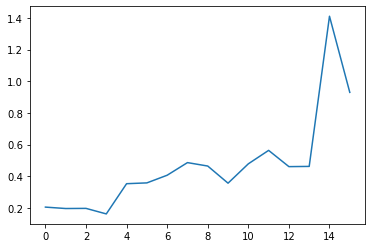

In [294]:
import copy
from matplotlib import pyplot as plt
import time

total_time = []

temp_matrix_list = copy.deepcopy(matrix_list)

for idx, m in enumerate(temp_matrix_list):
    print("=================")
    print("debut ", idx)

    start_time = time.perf_counter()

    cycle = []
    s = []
    c = 0

    s = euler_cycle(m, s, c)
    total_time.append((time.perf_counter() - start_time) * 1000)

    print(s)
    print("fin : ", total_time[-1], "ms")
plt.plot(total_time)
plt.show()

## Postier Chinois

In [1]:
import random
import numpy as np

def eulerizable(matrix):
    for line in matrix:
        if sum(list(map(sum, line))) == 0: return False
    return True

def random_graphe(size):
    b = np.random.choice((True, False), size=(size,size), p=[0.4, 0.6])
    b_symm = np.logical_or(b, b.T)
    matrix = b_symm.astype(int)
    matrix = list(map(lambda line: list(map((lambda n: [0,0] if n == 0 else [1,0]), line)), matrix))
    for k, line in enumerate(matrix):
        for j, col in enumerate(line):
            if col != [1,0]: continue
            number = random.randint(1,15)
            matrix[k][j] = [1,number]
            matrix[j][k] = [1,number]
    return matrix

def operation_on_matrix(matrix, current, index, operation):
    if current == index:
        matrix[current][index][0] += operation
    else:
        matrix[current][index][0] += operation
        matrix[index][current][0] += operation
    return matrix

def euler_cycle(matrix, stack, current):
    for i in range(len(matrix)):
        if matrix[current][i][0] >= 1:
            stack.append(current)
            matrix = operation_on_matrix(matrix, current, i, -1)
            if euler_cycle(matrix, stack, i):
                return stack
            else:
                matrix = operation_on_matrix(matrix, i, stack[-1], 1)
                current = stack[-1]
                del stack[-1]

    if matrix.any(): #sum(list(map(sum, matrix))) != 0
        return False
    return stack

def to_euler(matrix):
    not_pair = []
    for index, line in enumerate(matrix):
        nodes,weights = zip(*line)
        if (sum(nodes) + nodes[index]) % 2 != 0:
            not_pair.append(index)
    for line in matrix: print(line)
    for index in range(0, len(not_pair), 2):
        print("\n", not_pair[index], " - ", not_pair[index + 1], "\n")
        path = dijkstra(matrix, not_pair[index], not_pair[index + 1], [], {})
        print(path, "\n")
        current = not_pair[index + 1]
        while current != not_pair[index]:
            matrix = operation_on_matrix(matrix, current, path[current][0], 1)
            current = path[current][0]
        for j in matrix:
            print(list(j))
        print(list(map(lambda l: list(map(sum(lambda n: n[0]), l)), matrix)))
        #print(euler_cycle(matrix, [], 0))
    for line in matrix: print(line)



def dijkstra(matrix, node_a, node_b, links, total):
    """
    :param matrix: la matrice
    :param node_a: le noeud actuel
    :param node_b: le noeud final
    :param links: les liens
    :param total: les liens "valides"
    :return: le chemin
    """
    for link in links:
        if link[1] == node_a:
             links.remove(link)

    for index, node in enumerate(matrix[node_a]):
        if node[0] >= 1 and index != node_a:
            if node_a in total:
                if node[1] == total[node_a][0]:
                    continue
                links.append([node_a, index, node[1] + total[node_a][1]])
            else:
                links.append([node_a, index, node[1]])

    min = -1
    min_link = []
    for link in links:
        if link[0] in total and total[link[0]][0] == link[1]:
            continue
        if min == -1 or min > link[2]:
            min = link[2]
            min_link = link

    total[min_link[1]] = [min_link[0], min_link[2]]

    if node_b not in total:
        total = dijkstra(matrix, min_link[1], node_b, links, total)
    return total

m = random_graphe(5)
while not eulerizable(m):
   m = random_graphe(5)
to_euler(m)

[[0, 0], [0, 0], [1, 9], [0, 0], [1, 14]]
[[0, 0], [1, 1], [1, 6], [1, 12], [0, 0]]
[[1, 9], [1, 6], [0, 0], [1, 5], [0, 0]]
[[0, 0], [1, 12], [1, 5], [0, 0], [1, 1]]
[[1, 14], [0, 0], [0, 0], [1, 1], [0, 0]]

 2  -  3 

{3: [2, 5]} 

[[0, 0], [0, 0], [1, 9], [0, 0], [1, 14]]
[[0, 0], [1, 1], [1, 6], [1, 12], [0, 0]]
[[1, 9], [1, 6], [0, 0], [2, 5], [0, 0]]
[[0, 0], [1, 12], [2, 5], [0, 0], [1, 1]]
[[1, 14], [0, 0], [0, 0], [1, 1], [0, 0]]


TypeError: 'function' object is not iterable